# __Milestone 1__

# __Exploratory Data Analysis and Hypothesis Testing of the Bike Sales Dataset__

Ahmad Luay Adnani

Batch : FTDS - 018 - RMT

Looker Studio [Link](https://lookerstudio.google.com/reporting/86fb7f3c-1e23-4f8f-ba20-fad1e109b858)

---

![Alt text](https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iKI05Fk2vPTc/v2/-1x-1.jpg)

# i. Background

The background of this data set is not 100% clear as there is little or conflicting information on the Kaggle website. It seems the data set contains sales data from a global retail chain for countries Australia, Canada, France, Germany, UK and US in the years 2011 to 2016. The currency of the sale data is unknown, even so it is not clear if the sale data shows a mix of currencies for the different countries.

---

# ii. Problem Statement

Based on the background above, we have identified a problem statement: __to investigate bike sales in countries that have the most bike sales__ using SMART method:
- __Specific:__ The goal is to investigate bike sales in countries that have the most bike sales. The focus is on the top-performing countries.
- __Measurable:__ The analysis will involve collecting and analyzing data on bike sales in each country. The data will be used to identify trends and patterns in sales, and to compare sales between different countries.
- __Achievable:__ The analysis will be conducted using available data sources and tools, and within the constraints of available time and resources. The scope of the analysis will be limited to a specific set of countries, and the analysis will be focused on key metrics related to bike sales.
- __Relevant:__ The analysis is relevant to the broader context of the bike industry and can inform decisions related to marketing, product development, and expansion into new markets.
- __Time-Bound:__ The analysis will be conducted over a specific time period, with a set deadline for completion. The timeline will be based on the availability of data and the scope of the analysis.

---

# iii. Objective

The objective of this analysis are:
1. Find out which country has the most bike sales
2. Find out when the highest revenue is generated from selling bikes
3. Find out the types of bikes with the highest sales in the country and the year with the highest bike sales.
4. Find out the age group with the most bike sales in the country and the year with the highest bike sales
5. Determine whether the gender factor has an effect on bike sales

---

# iv. Data Preparation

## Importing Libraries

Libraries The libraries used include numpy, pandas, scipy, matplotlib and seaborn. Provided dataset is from __[here](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe)__.

In [585]:
# General Libraries
import numpy as np
import pandas as pd
from scipy import stats

# Visualization Libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#Libraries Version
print('Numpy Version: ', np.__version__)
print('Pandas Version: ', pd.__version__)
print('Seaborn Version: ', sns.__version__)

Numpy Version:  1.24.1
Pandas Version:  1.5.3
Seaborn Version:  0.12.2


## Data Loading

Following are the steps for Data Loading :

In [586]:
#  Data Loading
df = pd.read_csv('h8dsft_P0W4_Ahmad Luay Adnani.csv')
# Preview Data
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [587]:
# Preview Data
df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),Male,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),Male,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),Male,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),Female,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),Female,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


The table above shows the top 5 rows and the bottom 5 rows of the dataset. Following are the definitions of the variables for each column in the dataset:

Variable | Definition
---|---
`Date` | Date of sale.
`Day` | Day.
`Month` | Month.
`Year` | Year.
`Customer_Age` | Customer age in years.
`Age_Group` | Age group.
`Customer_Gender` | Sex.
`Country` | Country where product was sold.
`State` | State where product was sold.
`Product_Category` | Product category.
`Sub_Category` | Product sub-category.
`Product` | Product name.
`Order_Quantity` | Quantity purchased by customer.
`Unit_Cost` | Cost per unit.
`Unit_Price` | Retail price per unit.
`Profit` | Profit per sale.
`Cost` | Cost per sale.
`Revenue` |Revenue per sale.


The following is the number of rows and columns of the dataset :

In [588]:
# Number of Rows and Columns
df.shape

(113036, 18)

The dataset used for analysis has __113,036__ rows and __18__ columns. The following is information from the dataset used for analysis :

In [589]:
# Summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

From the information above, it is known that column `Date`,`Month`,`Age_Group`,`Customer_Gender`,`Country`,`State`, `Product_Category`, `Sub_Category` and `Product` are strings. Column `Day`,`Year`,`Customer_Age`,`Order_Quantity`, `Unit_Cost`, `Unit_Price`, `Profit`, `Cost` and `Revenue` are integers.

The following are the steps to check whether there is duplicated data from the dataset used for analysis :

In [590]:
# Check for duplicate entries
df.duplicated().value_counts()

False    112036
True       1000
dtype: int64

There are __1000__ duplicated entries from dataset used for analysis.

---

## Data Cleaning

Following are the steps to perform data cleaning :

In [591]:
# Creating a copy of dataset.
dfcopy = df.copy()

### Remove duplicated entries

Following are the steps to remove duplicated entries:

In [592]:
# percentage of duplicated data 0.08%
# drop duplicated rows
dfcopy = dfcopy.drop_duplicates()
dfcopy.duplicated().value_counts()

False    112036
dtype: int64

The number of rows after the duplicated data is removed is __112.036__ rows.

### Check missing value

The following are the steps to check for missing values:

In [593]:
# missing value check
dfcopy.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

There is no missing value from the dataset used for analysis.

---

# v. Data Exploration

The following is the basic information of the dataset used for analysis:

## Basic Information

### Countries with the most bike sales

Here are the countries with the most bike sales : 

In [594]:
# Countries with the most sales
dfcopy['Country'].value_counts().to_frame()

,Country
United States,38840
Australia,23736
Canada,14027
United Kingdom,13486
Germany,11027
France,10920


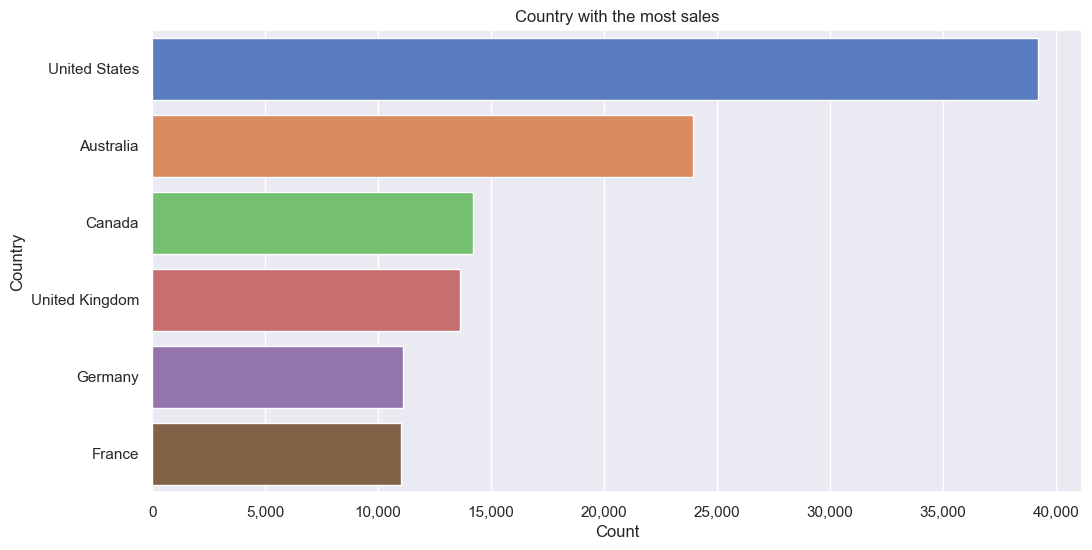

In [595]:
# define Seaborn theme
# sns.set_theme(style="whitegrid")
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12, 6))
# plotting data on chart
sns.countplot(y=df['Country'], palette='muted',order=df['Country'].value_counts().index)
  
# displaying chart
plt.title('Country with the most sales')
plt.xlabel('Count')
plt.ylabel('Country')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

From the table and visualization above it is known that the country with the most bike sales is __United States__ with total sales of __38,840__ units.

### Year with the highest revenues

Here are the years with the highest revenues :

In [596]:
# Profit by year
revenue = dfcopy.groupby(by=['Year'])['Revenue'].sum().to_frame()
revenue

,Revenue
Year,
2011,8951966
2012,9133795
2013,15117327
2014,14040192
2015,19945703
2016,17637789


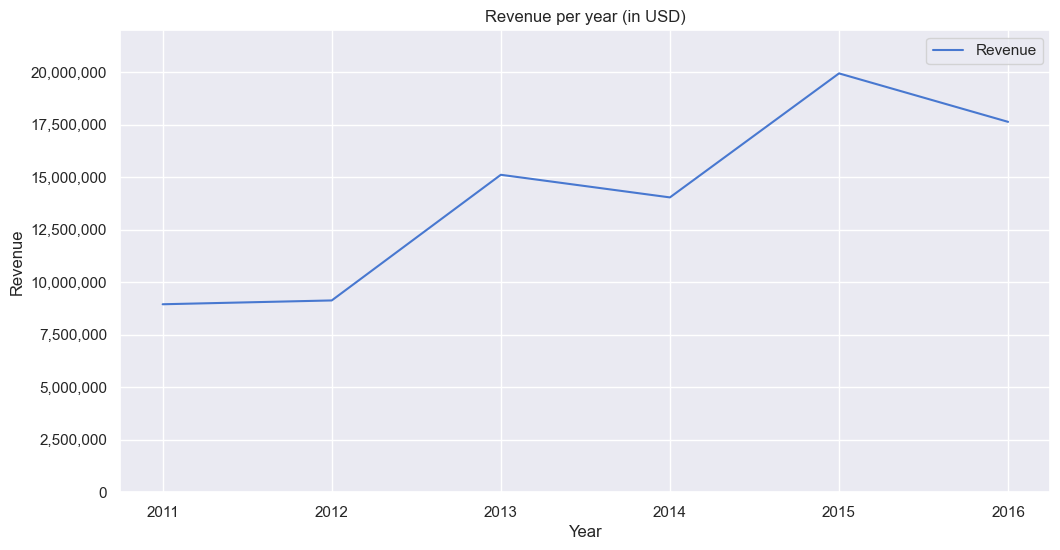

In [597]:
# define Seaborn theme
sns.set(font_scale=1)
# plotting data on chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=revenue,palette='muted').set_ylim(0,22000000)
  
# displaying chart
plt.title('Revenue per year (in USD)')
plt.xlabel('Year')
plt.ylabel('Revenue')
current_values = plt.gca().get_yticks()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

From the table and visualization above it is known that the year with the highest revenues is __2015__ with total revenue of __$19,945,703__.

### Product category with the most sales.

Here are the categories with the most sold products :

In [598]:
#Product Category with the most sales
dfcopy['Product_Category'].value_counts().to_frame()

,Product_Category
Accessories,69312
Bikes,25794
Clothing,16930


Categories with the most sold products is __Accessories__ with __69.312__ products sold.

## Advanced Data Exploration

The data used for statistical analysis is sales data for the __Bikes__ product category in the __United States__ in __2015__. The following is a display of the data that will be used for statistical analysis :

In [599]:
# dataset of bike sales in US in 2015
us = dfcopy[(dfcopy['Country']=='United States')&(dfcopy['Year']==2015)&(dfcopy['Product_Category']=='Bikes')].sort_values(by='Date',ascending=True)
# preview of dataset
us.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
54069,2015-01-01,1,January,2015,36,Adults (35-64),Female,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,1008,1266,2274
60423,2015-01-01,1,January,2015,29,Young Adults (25-34),Female,United States,Florida,Bikes,Road Bikes,"Road-650 Red, 62",3,487,783,771,1461,2232
60429,2015-01-01,1,January,2015,29,Young Adults (25-34),Male,United States,Oregon,Bikes,Road Bikes,"Road-650 Black, 44",1,487,783,186,487,673


In [600]:
# preview of dataset
us.tail(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
53123,2015-12-31,31,December,2015,46,Adults (35-64),Female,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 40",1,420,769,334,420,754
71317,2015-12-31,31,December,2015,30,Young Adults (25-34),Male,United States,California,Bikes,Road Bikes,"Road-150 Red, 56",2,2171,3578,2671,4342,7013
57821,2015-12-31,31,December,2015,38,Adults (35-64),Male,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1008,1266,2274


In [601]:
#Number of Rows and Columns
us.shape

(1726, 18)

The data used for statistical analysis has __1,726__ rows and __18__ columns.

### State with the most bike sales

Here are the states with the most bike sales:

In [602]:
# Top 3 States with the most bike sales
State =us['State'].value_counts().to_frame().head(3)
State

,State
California,1041
Washington,464
Oregon,212


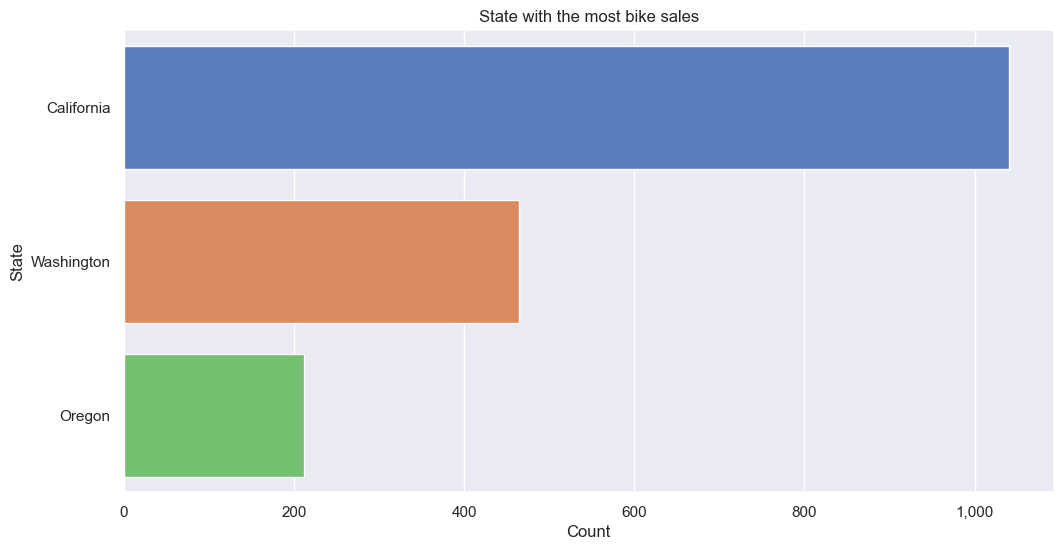

In [603]:
# define Seaborn theme
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12, 6))
# plotting data on chart
sns.countplot(y=us['State'], palette='muted',order=us['State'].value_counts().head(3).index)
  
# displaying chart
plt.title('State with the most bike sales')
plt.xlabel('Count')
plt.ylabel('State')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

From the table and visualization above it is known that the 3 states with the most bike sales are __California__ (1,041 Bikes sold), __Washington__ (464 Bikes sold) and __Oregon__ (212 Bikes sold). 

### Sub-category products with the most sales.

Here are sub-category products with the most sales:

In [604]:
# Sub Category with the most sales
us['Sub_Category'].value_counts().to_frame()

,Sub_Category
Road Bikes,738
Mountain Bikes,730
Touring Bikes,258


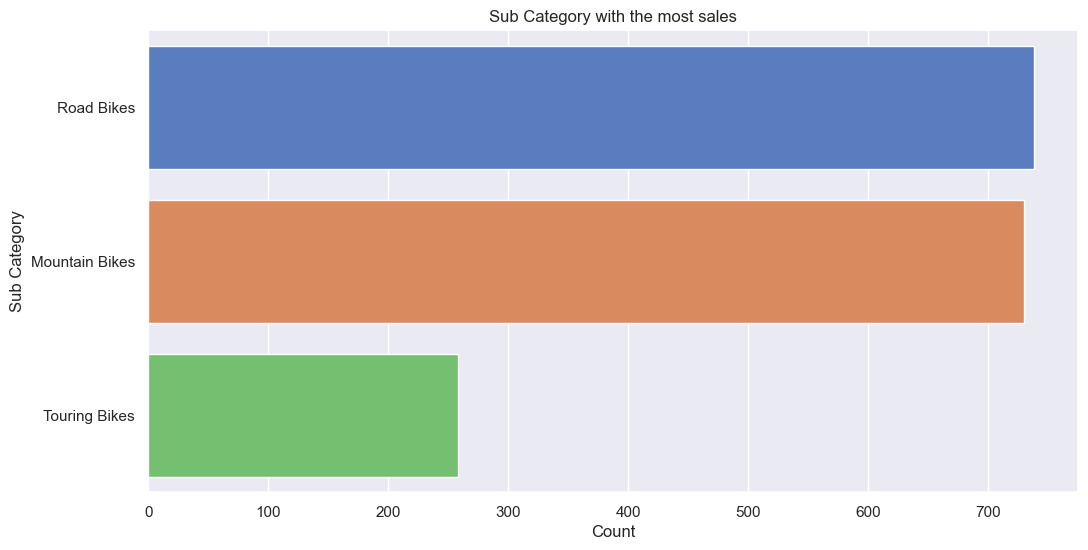

In [605]:
# define Seaborn theme
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12, 6))
# plotting data on chart
sns.countplot(y=us['Sub_Category'], palette='muted',order=us['Sub_Category'].value_counts().index)
  
# displaying chart
plt.title('Sub Category with the most sales')
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

From the table and visualization above it is known that the 3 sub-category products with the highest sales are __Road Bikes__ (738 products sold), __Mountain Bikes__ (730 products sold) and __Touring Bikes__ (258 products sold). 

### Products with the most sales

Here are the products with the most sales:

In [606]:
# product with the most sales
us['Product'].value_counts().to_frame().head(15)

,Product
"Mountain-200 Silver, 42",116
"Mountain-200 Silver, 38",109
"Mountain-200 Black, 38",94
"Mountain-200 Black, 46",92
"Mountain-200 Black, 42",81
"Road-150 Red, 52",66
"Road-750 Black, 44",60
"Road-750 Black, 48",54
"Mountain-200 Silver, 46",53
"Road-150 Red, 56",52


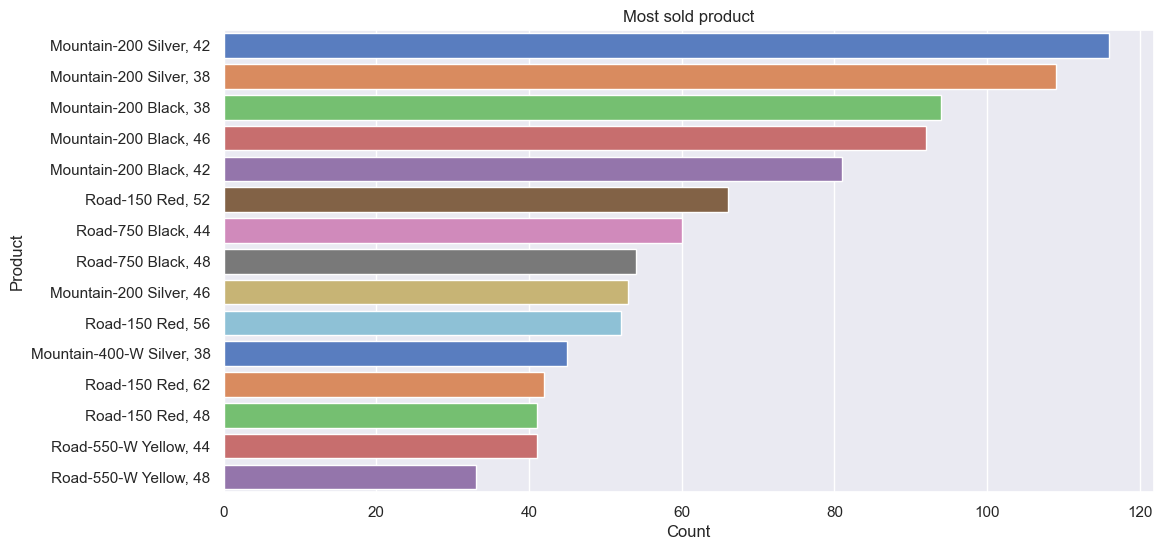

In [607]:
# define Seaborn theme
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12, 6))
# plotting data on chart
sns.countplot(y=us['Product'], palette='muted',order=us['Product'].value_counts().head(15).index)
  
# displaying chart
plt.title('Most sold product')
plt.xlabel('Count')
plt.ylabel('Product')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

From the table and visualization above it is known that the products with the most sales is __Mountain-200 Silver, 42__ with __116__ products sold.

### Age group with the most sales

Here are age group of customers with the most sales:

In [608]:
# age group with most sales
us['Age_Group'].value_counts().to_frame()

,Age_Group
Adults (35-64),809
Young Adults (25-34),708
Youth (<25),207
Seniors (64+),2


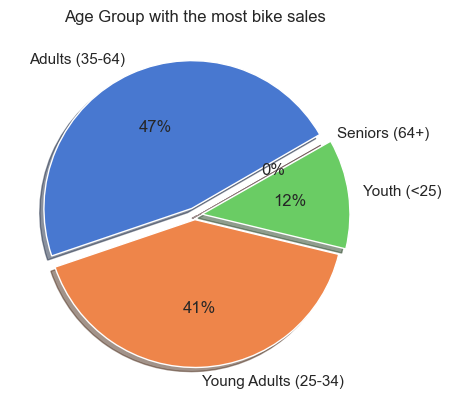

In [609]:
#define Seaborn color palette to use
labels = 'Adults (35-64)', 'Young Adults (25-34)','Youth (<25)','Seniors (64+)'
colors = sns.color_palette('muted')
explode = (0.05,0.03,0.05,0.01)
#create pie chart
plt.pie(us['Age_Group'].value_counts(),explode=explode,labels=labels, colors = colors, autopct='%.0f%%',shadow=True,startangle=30)
plt.title('Age Group with the most bike sales')
plt.show()

From the table and visualization above it is known that the age group of customers with the most bike sales is __Adult (35-64)__.

### Gender of customer with the most bike sales

Here are the gender of customer with the most bike sales :

In [610]:
# Customer Gender with the most bike sales
us['Customer_Gender'].value_counts().to_frame()

,Customer_Gender
Female,900
Male,826


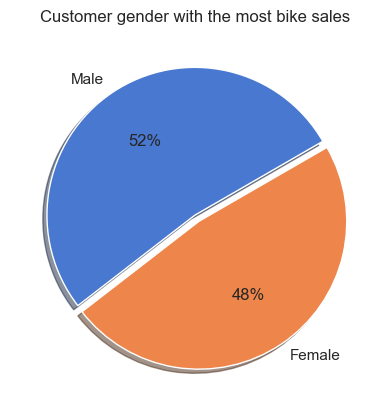

In [611]:
#define Seaborn color palette to use
labels = 'Male', 'Female'
colors = sns.color_palette('muted')
explode = (0, 0.05)
#create pie chart
plt.pie(us['Customer_Gender'].value_counts(),explode=explode,labels=labels, colors = colors, autopct='%.0f%%',shadow=True,startangle=30)
plt.title('Customer gender with the most bike sales')
plt.show()

From the table and visualization above it is known that the gender of customers with the most bike sales is __Male__.

### Profit, Cost and Revenue each month

Here are the profits, costs and revenue each month:

In [612]:
# Profit, Cost and Revenue each month
us.groupby(by=['Month'],sort=False).aggregate({'Profit':'sum','Cost':'sum','Revenue':'sum'})

,Profit,Cost,Revenue
Month,,,
January,60009,111588,171597
February,51705,91494,143199
March,50686,96287,146973
April,64092,129760,193852
May,87310,162788,250098
June,83600,147681,231281
July,140574,253668,394242
August,164536,283856,448392
September,157947,268601,426548


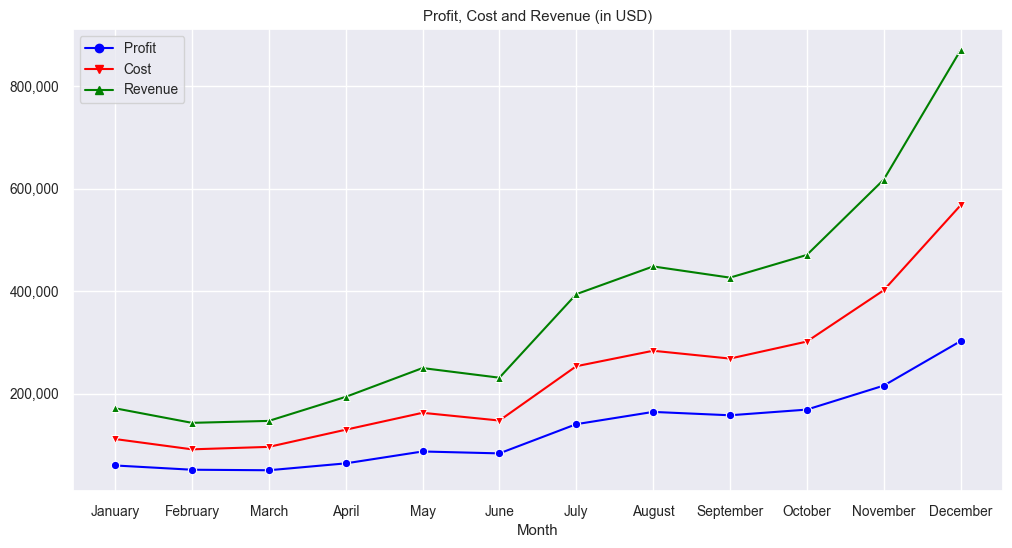

In [613]:
pcr = us.copy()
pcr.drop(['Date','Day','Year','Customer_Age','Age_Group','Customer_Gender','Country','State','Product_Category','Sub_Category','Product','Order_Quantity','Unit_Cost','Unit_Price'],inplace=True,axis=1)
pcr_p = pcr.groupby(by=['Month'],sort=False)['Profit'].sum().to_frame()
pcr_c = pcr.groupby(by=['Month'],sort=False)['Cost'].sum().to_frame()
pcr_r = pcr.groupby(by=['Month'],sort=False)['Revenue'].sum().to_frame()
# define Seaborn theme
sns.set(font_scale=0.9)
# plotting data on chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=pcr_p,palette=['blue'],markers='o')
sns.lineplot(data=pcr_c,palette=['red'],markers='v')
sns.lineplot(data=pcr_r,palette=['green'],markers='^')
  
# displaying chart
plt.title('Profit, Cost and Revenue (in USD)')
current_values = plt.gca().get_yticks()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

From the table and visualization above it is known that :
- Profit from bike sales at the end of 2015 is __$302,594__
- Cost from bike sales at the end of 2015 is __$567,654__
- Revenue from bike sales at the end of 2015 is __$870,248__

---

# vi. Descriptive Statistics Analysis

## Central Tendency 

The following are the central tendencies of the dataset used for analysis:

In [614]:
# create copy
ct = us.copy()
# drop unused column
ct.drop(['Date','Day','Month','Year','Customer_Age','Age_Group','Customer_Gender','Country','State','Product_Category','Sub_Category','Product','Order_Quantity'],inplace=True,axis=1)

In [615]:
# count, mean, std, min, max ,q1 ,q2 (median) and q3
round(ct.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Unit_Cost,1726.0,1106.66,578.32,295.0,487.00,1252.0,1482.0,2171.0
Unit_Price,1726.0,1884.32,976.98,540.0,783.00,2295.0,2384.0,3578.0
Profit,1726.0,896.81,769.68,77.0,360.25,722.0,1076.0,4006.0
Cost,1726.0,1632.12,1261.79,295.0,755.00,1266.0,2171.0,6513.0
Revenue,1726.0,2528.93,1977.81,421.0,1098.00,2195.0,3332.0,10519.0


In [616]:
# mode
ct.mode()

,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1266,2320,1008,1266,2274


In [617]:
# range
print('Range of Unit_Cost= $',ct['Unit_Cost'].max()-ct['Unit_Cost'].min())
print('Range of Unit_Price= $',ct['Unit_Price'].max()-ct['Unit_Price'].min())
print('Range of Profit= $',ct['Profit'].max()-ct['Profit'].min())
print('Range of Cost= $',ct['Cost'].max()-ct['Cost'].min())
print('Range of Revenue= $',ct['Revenue'].max()-ct['Revenue'].min())

Range of Unit_Cost= $ 1876
Range of Unit_Price= $ 3038
Range of Profit= $ 3929
Range of Cost= $ 6218
Range of Revenue= $ 10098


In [618]:
#  variance
round(ct.var().to_frame(),2)

,0
Unit_Cost,334453.44
Unit_Price,954484.05
Profit,592400.57
Cost,1592124.65
Revenue,3911737.95


From the tables above, some information obtained:

### Central tendecy of `Unit_Cost` column

The central tendency of `Unit_Cost` column  :
- __Mean__ of `Unit_Cost` column  is __$1,106.66__
- __Median__ of `Unit_Cost` column is __$1,252__
- __Mode__ of `Unit_Cost` column is __$1,266__
- __Standard Deviation__ of `Unit_Cost` column is __578.32__
- __Range__ of `Unit_Cost` column  is __$1,876__
- __Variance__ of `Unit_Cost` column  is __334,453__

Below is a histogram of the `Unit_Cost` column :

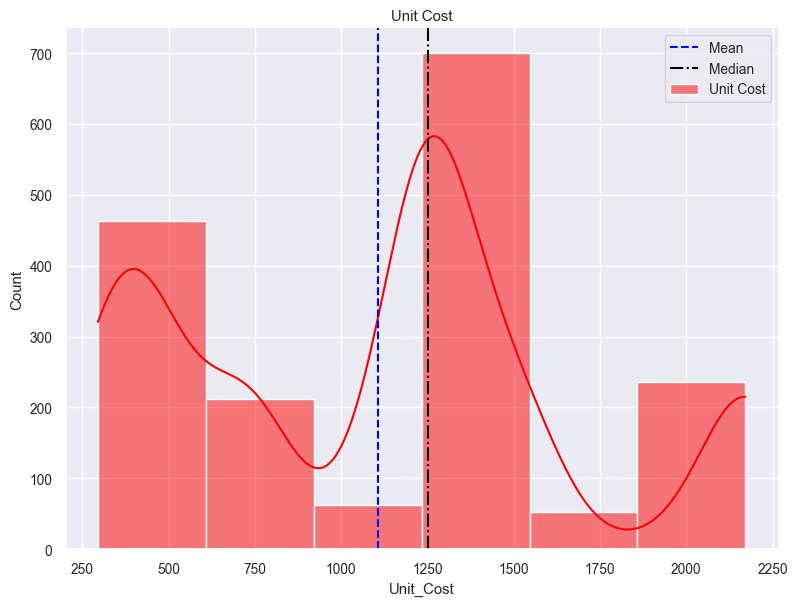

In [619]:
# histogram Unit_Cost
sns.displot(ct.Unit_Cost, bins=6,aspect=1.35,height=6, kde=True,label = 'Unit Cost',color='red')
plt.axvline(ct.Unit_Cost.mean(),color='blue',label = 'Mean',ls='--')
plt.axvline(ct.Unit_Cost.median(),color='black',label = 'Median',ls='-.')
plt.title('Unit Cost')
plt.legend()

From the visualization above it can be seen that the histogram is bell-shaped, this indicates that the data is __normally distributed__.

### Central Tendecy of Column `Unit_Price`

The central tendency of `Unit_Price` column :
- __Mean__ of `Unit_Price` column is __$1,884.32__
- __Median__ of `Unit_Price` column is __$2,295__
- __Mode__ of `Unit_Price` column  is __$2,320__
- __Standard Deviation__ of `Unit_Price` column is __976.98__
- __Range__ of `Unit_Price` column is __$3,038__
- __Variance__ of `Unit_Price` column is __954,484__

Below is a histogram of the `Unit_Price` column :

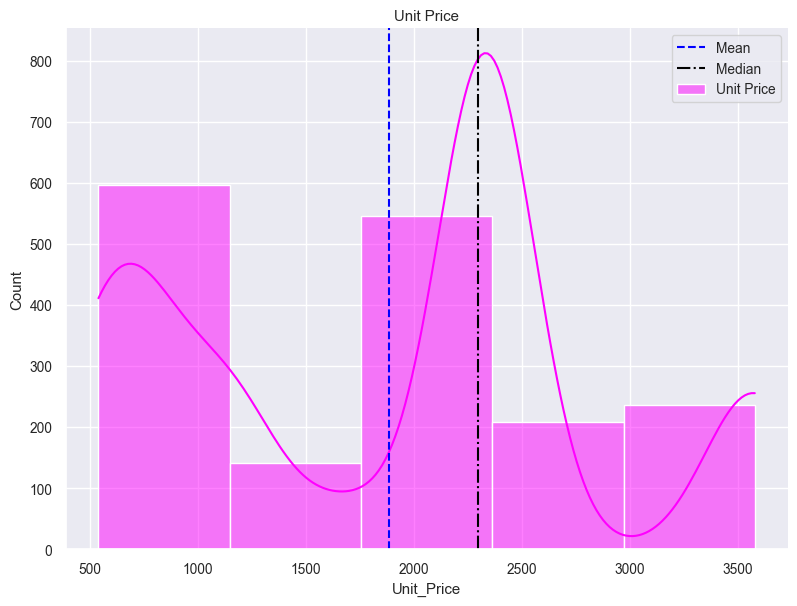

In [620]:
# histogram Unit_Price
sns.displot(ct.Unit_Price, bins=5,aspect=1.35,height=6, kde=True,label = 'Unit Price',color='magenta')
plt.axvline(ct.Unit_Price.mean(),color='blue',label = 'Mean',ls='--')
plt.axvline(ct.Unit_Price.median(),color='black',label = 'Median',ls='-.')
plt.title('Unit Price')
plt.legend()

From the visualization above it can be seen that the histogram is bell-shaped, this indicates that the data is __normally distributed__.

### Central Tendecy of Column `Profit`

The central tendency of `Profit` column :
- __Mean__ of `Profit` column is __$896.81__
- __Median__ of `Profit` column is __$722__
- __Mode__ of `Profit` column is __$1,008__
- __Standard Deviation__ of `Profit` column is __769.68__
- __Range__ of `Profit` column is __$3,929__
- __Variance__ of `Profit` column  is __592,400.57__

Below is a histogram of the column `Profit`:

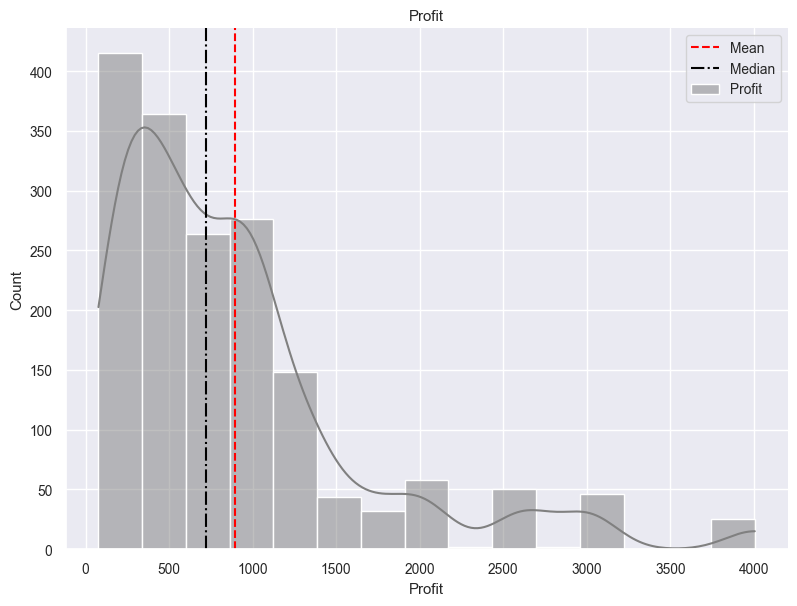

In [621]:
# histogram Profit
sns.displot(ct.Profit, bins=15,aspect=1.35,height=6, kde=True,label = 'Profit',color='gray')
plt.axvline(ct.Profit.mean(),color='red',label = 'Mean',ls='--')
plt.axvline(ct.Profit.median(),color='black',label = 'Median',ls='-.')
plt.title('Profit')
plt.legend()

In [622]:
# Skew of Profit
print('Profit Skew =',ct['Profit'].skew())

Profit Skew = 1.8060233183317254


From the visualization above it can be seen that __mean > median__, this shows the distribution of the data is __right-skewed__ with skew value of __1.81 > 1__.

### Central Tendecy of Column `Cost`

The central tendency of `Cost` column :
- __Mean__ of `Cost` column is __$2,528.93__
- __Median__ of `Cost` column is __$1,266__
- __Mode__ of `Cost` column is __$1,266__
- __Standard Deviation__ of `Cost` column  is __1,261.79__
- __Range__ of `Cost` column  is __$6,218__
- __Variance__ of `Cost` column  is __1,592,124.65__

Below is a histogram of the `Cost` column:

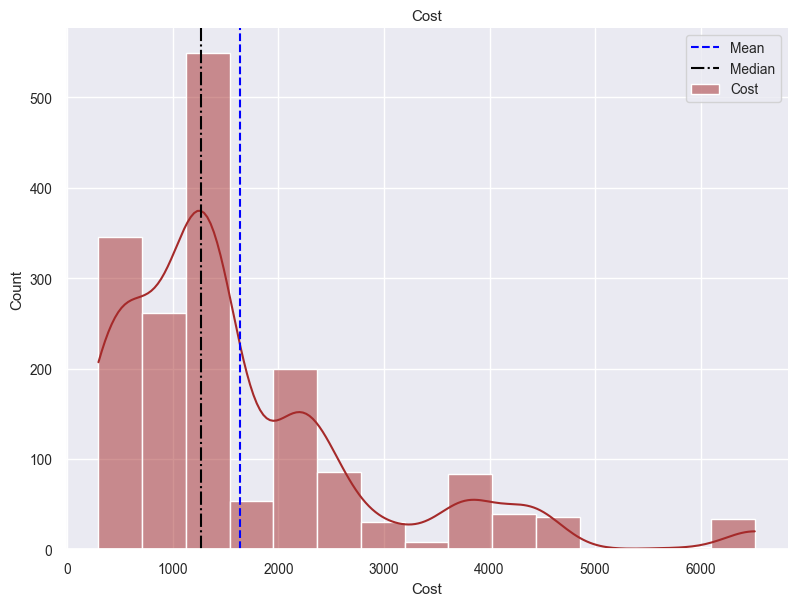

In [623]:
# histogram Cost
sns.displot(ct.Cost, bins=15,aspect=1.35,height=6, kde=True,label = 'Cost',color='brown')
plt.axvline(ct.Cost.mean(),color='blue',label = 'Mean',ls='--')
plt.axvline(ct.Cost.median(),color='black',label = 'Median',ls='-.')
plt.title('Cost')
plt.legend()

In [624]:
# Skew of Cost
print('Cost Skew =',ct['Cost'].skew())

Cost Skew = 1.7092787614783476


From the visualization above it can be seen that __mean > median__, this shows the distribution of the data is __right-skewed__ with skew value of __1.71 > 1__.

### Central Tendecy of Column `Revenue`

The central tendency of `Revenue` column :
- __Mean__ of `Revenue` column is __$2,528.93__
- __Median__ of `Revenue` column is __$2,195__
- __Mode__ of `Revenue` column is __$2,274__
- __Standard Deviation__ of column `Revenue` is __1,977.81__
- __Range__ of `Revenue` column is __$10,098__
- __Variance__ of `Revenue` column is __3,911,737.95__

Below is a histogram of the `Revenue` column :

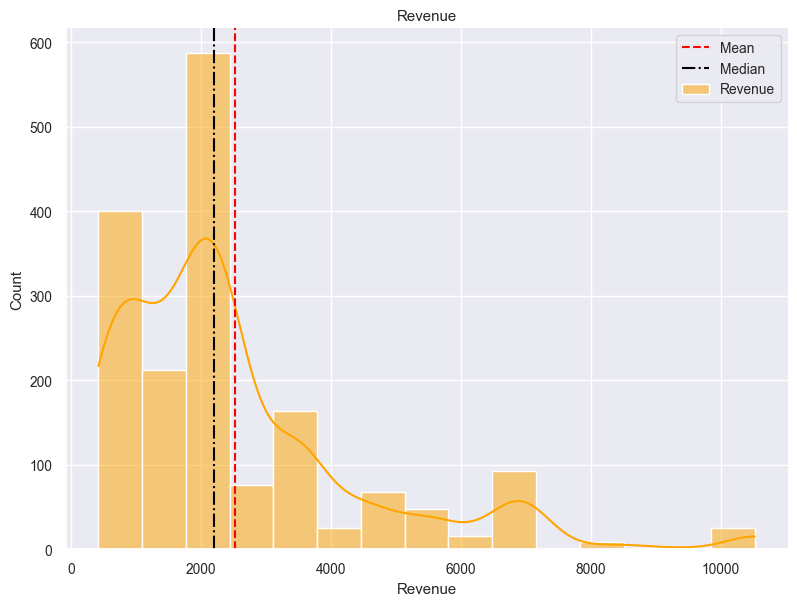

In [625]:
# histogram Revenue
sns.displot(ct.Revenue, bins=15,aspect=1.35,height=6, kde=True,label = 'Revenue',color='orange')
plt.axvline(ct.Revenue.mean(),color='red',label = 'Mean',ls='--')
plt.axvline(ct.Revenue.median(),color='black',label = 'Median',ls='-.')
plt.title('Revenue')
plt.legend()

In [626]:
# Skew of Revenue
print('Revenue Skew =',ct['Revenue'].skew())

Revenue Skew = 1.7087867978978653


From the visualization above it can be seen that __mean > median__, this shows the distribution of the data is __right-skewed__ with skew value of __1.71 > 1__.

## Extreme Value Analysis

Below is a box-plot visualization of the dataset:

<AxesSubplot: >

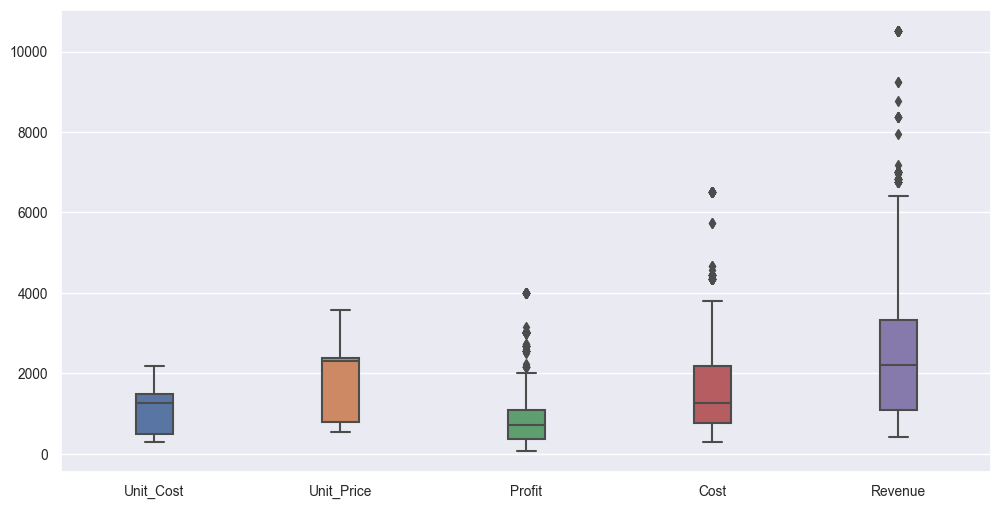

In [627]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=ct,width=0.20)

From the visualization above it can be seen that there are outliers in the column `Profit`,`Cost` and `Revenue`. The method used for extreme value analysis is the __tukey method__ because the data is not normally distributed.

### Extreme Value Analysis in the `Profit` column

Following are the steps for extreme value analysis in the `Profit` column :

In [628]:
usc = ct.copy()
usc.shape

(1726, 5)

In [629]:
# perhitungan iqr
iqrp = usc['Profit'].quantile(0.75) - usc['Profit'].quantile(0.25)
print('iqr =',iqrp)
#Upper boundary
upper_boundp = usc['Profit'].quantile(0.75) + 1.5*iqrp
print('Upper Boundary =',upper_boundp)
#lower boundary
lower_boundp = usc['Profit'].quantile(0.25) - 1.5*iqrp
print('Lower boundary =',lower_boundp)
# Shows which data exceed the upper boundary
df_upperp = usc.loc[usc['Profit'] > upper_boundp]
print('number of outlier =',df_upperp.value_counts().sum())
# Shows which data exceed the lower boundary
df_lowerp = usc.loc[usc['Profit'] < lower_boundp]
df_lowerp.value_counts().sum()
# Outlier Percentage
print('Outlier Percentage =',df_upperp.value_counts().sum()/ct.value_counts().sum())
#handling the outlier
usc.drop(index = df_upperp.index,inplace=True)
usc.shape

iqr = 715.75
Upper Boundary = 2149.625
Lower boundary = -713.375
number of outlier = 132
Outlier Percentage = 0.07647740440324449


(1594, 5)

From the calculations above, some information is obtained :
- The value of Interquartile Range (IQR) is __715.75__
- The upper boundary value is __2,149.63__
- The lower boundary value is __-713.38__
- There are __132__ Outliers in the `Profit` column
- The percentage of outliers are __7.65%__ of the total data.
- Now the dataset only has __1594__ rows from 1726 rows originally.

Below are the visualization after extreme value analysis in the `Profit` column.

<AxesSubplot: >

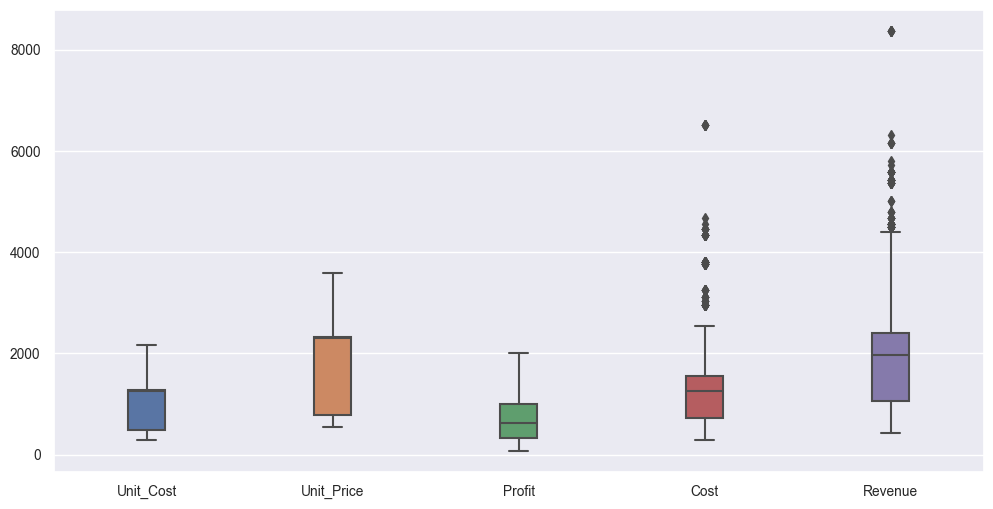

In [630]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=usc,width=0.20)

From the visualization above, it can be seen that the `Profit` column has no outliers.

### Extreme Value Analysis in the `Cost` column

Following are the steps for extreme value analysis in the `Cost` column :

In [631]:
# perhitungan iqr
iqrc = usc['Cost'].quantile(0.75) - usc['Cost'].quantile(0.25)
print('iqr =',iqrc)
#Upper boundary
upper_boundc = usc['Cost'].quantile(0.75) + 1.5*iqrc
print('Upper Boundary =',upper_boundc)
#lower boundary
lower_boundc = usc['Cost'].quantile(0.25) - 1.5*iqrc
print('Lower boundary =',lower_boundc)
# Shows which data exceed the upper boundary
df_upperc = usc.loc[usc['Cost'] > upper_boundc]
print('number of outlier =',df_upperc.value_counts().sum())
# Shows which data exceed the lower boundary
df_lowerc = usc.loc[usc['Cost'] < lower_boundc]
df_lowerc.value_counts().sum()
# Outlier Percentage
print('Outlier Percentage =',df_upperc.value_counts().sum()/usc.value_counts().sum())
#handling the outlier
usc.drop(index = df_upperc.index,inplace=True)
usc.shape

iqr = 842.0
Upper Boundary = 2818.0
Lower boundary = -550.0
number of outlier = 100
Outlier Percentage = 0.06273525721455459


(1494, 5)

From the calculations above, some information is obtained :
- The value of Interquartile Range (IQR) is __842__
- The upper boundary value is __2,818__
- The lower boundary value is __-550__
- There are __100__ Outliers in the `Cost` column
- The percentage of outliers are __6.27%__ of the total data.
- Now the dataset only has __1494__ rows from 1594 rows.

Below are the visualization after extreme value analysis in the `Cost` column.

<AxesSubplot: >

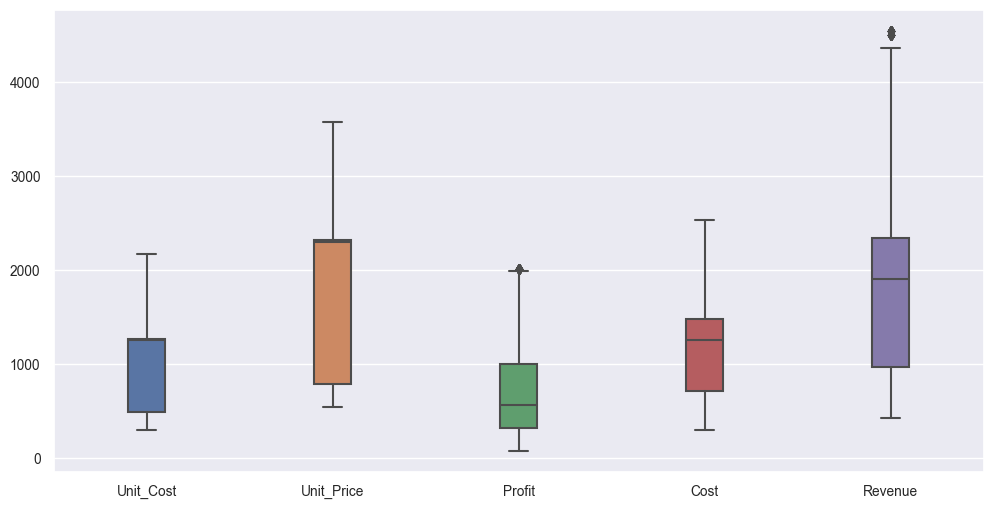

In [632]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=usc,width=0.20)

From the visualization above, it can be seen that the `Cost` column has no outliers.

### Extreme Value Analysis in the `Revenue` column

Following are the steps for extreme value analysis in the `Revenue` column :

In [633]:
# perhitungan iqr
iqrr = usc['Revenue'].quantile(0.75) - usc['Revenue'].quantile(0.25)
print('iqr =',iqrr)
#Upper boundary
upper_boundr = usc['Revenue'].quantile(0.75) + 1.5*iqrr
print('Upper Boundary =',upper_boundr)
#lower boundary
lower_boundr = usc['Revenue'].quantile(0.25) - 1.5*iqrr
print('Lower boundary =',lower_boundr)
# Shows which data exceed the upper boundary
df_upperr = usc.loc[usc['Revenue'] > upper_boundr]
print('number of outlier =',df_upperr.value_counts().sum())
# Shows which data exceed the lower boundary
df_lowerr = usc.loc[usc['Revenue'] < lower_boundr]
df_lowerr.value_counts().sum()
# Outlier Percentage
print('Outlier Percentage =',df_upperr.value_counts().sum()/ct.value_counts().sum())
#handling the outlier
usc.drop(index = df_upperr.index,inplace=True)
usc.shape


iqr = 1373.0
Upper Boundary = 4395.5
Lower boundary = -1096.5
number of outlier = 50
Outlier Percentage = 0.028968713789107765


(1444, 5)

From the calculations above, some information is obtained :
- The value of Interquartile Range (IQR) is __1,373__
- The upper boundary value is __4,395.5__
- The lower boundary value is __-1,096.5__
- There are __50__ Outliers in the `Revenue` column
- The percentage of outliers are __2.90%__ of the total data.
- Now the dataset only has __1444__ rows from 1494 rows.

Below are the visualization after extreme value analysis in the `Revenue` column.

<AxesSubplot: >

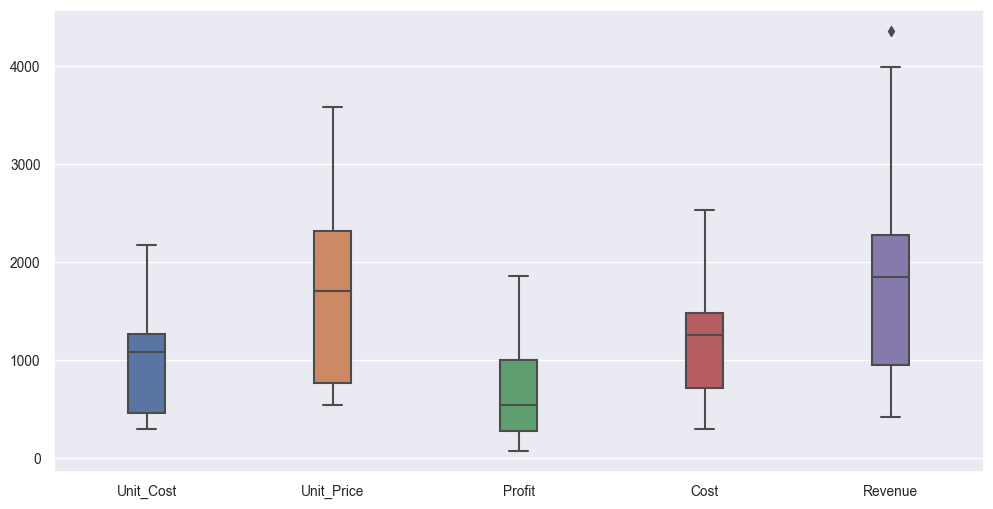

In [634]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=usc,width=0.20)

From the visualization above, it can be seen that the `Revenue` column still has few outliers.

## Central tendency after extreme values removed

The following are the central tendencies of the dataset after extreme value analysis:

In [635]:
# Central Tendency after extreme values analysis
round(usc.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Unit_Cost,1444.0,1019.49,569.59,295.0,461.0,1083.0,1266.0,2171.0
Unit_Price,1444.0,1734.23,969.43,540.0,769.0,1701.0,2320.0,3578.0
Profit,1444.0,630.11,370.34,77.0,280.0,546.0,997.0,1857.0
Cost,1444.0,1175.88,604.19,295.0,713.0,1252.0,1482.0,2532.0
Revenue,1444.0,1805.99,928.72,421.0,948.0,1846.0,2274.0,4361.0


In [636]:
# Mode After extreme values analysis
usc.mode()

,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1252,540,1008,1266,2274


In [637]:
# range After extreme values analysis
print('Range of Unit_Cost= $',usc['Unit_Cost'].max()-usc['Unit_Cost'].min())
print('Range of Unit_Price= $',usc['Unit_Price'].max()-usc['Unit_Price'].min())
print('Range of Profit= $',usc['Profit'].max()-usc['Profit'].min())
print('Range of Cost= $',usc['Cost'].max()-usc['Cost'].min())
print('Range of Revenue= $',usc['Revenue'].max()-usc['Revenue'].min())

Range of Unit_Cost= $ 1876
Range of Unit_Price= $ 3038
Range of Profit= $ 1780
Range of Cost= $ 2237
Range of Revenue= $ 3940


In [638]:
# variance After extreme values analysis
round(usc.var(),2).to_frame()

,0
Unit_Cost,324427.65
Unit_Price,939789.94
Profit,137155.26
Cost,365040.86
Revenue,862523.04


From the tables above, some information obtained:

### Central tendecy of `Unit_Cost` column after extreme value analysis

The central tendency of `Unit_Cost` column :
- __Mean__ of `Unit_Cost` column is __$1,019.49__
- __Median__ of `Unit_Cost` column is __$1,083__
- __Mode__ of `Unit_Cost` column is __$1,252__
- __Standard Deviation__ of `Unit_Cost` column is __569.59__
- __Range__ of `Unit_Cost` column is __$1,876__
- __Variance__ of `Unit_Cost` column is __324,427.6__

### Central tendecy of `Unit_Price` column after extreme value analysis

The central tendency of column `Unit_Price` :
- __Mean__ of `Unit_Price` column is __$1,734.23__
- __Median__ of `Unit_Price` column is __$1,701__
- __Mode__ of `Unit_Price` column is __$540__
- __Standard Deviation__ of `Unit_Price` column is __969,43__
- __Range__ of `Unit_Price` column is __$3,038__
- __Variance__ of `Unit_Price` column is __939,789.94__

### Central tendecy of column `Profit` after extreme value analysis

The central tendency of column `Profit` :
- __Mean__ of `Profit` column is __$630.11__
- __Median__ of `Profit` column is __$546__
- __Mode__ of `Profit` column is __$1,008__
- __Standard Deviation__ of `Profit` column is __370.34__
- __Range__ of `Profit` column is __$1,780__
- __Variance__ of `Profit` column is __137,155.26__

Below is a histogram of the `Profit` column:

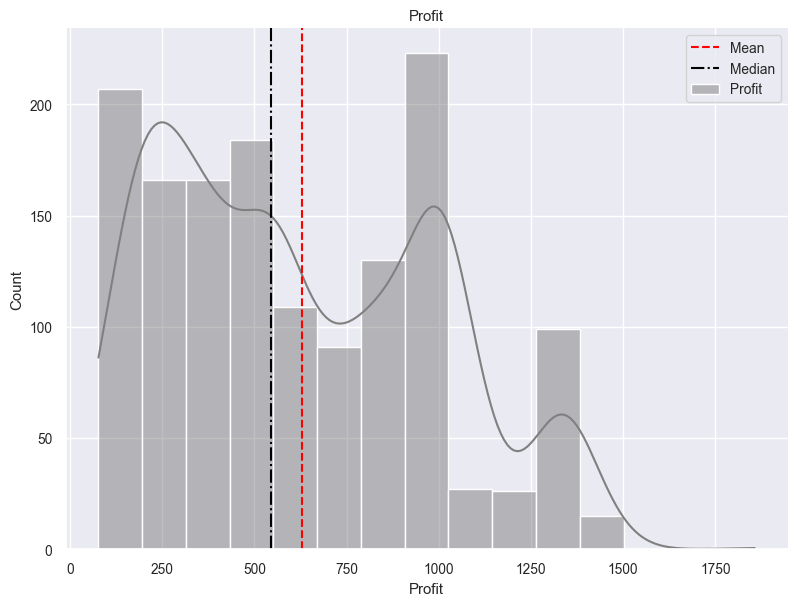

In [639]:
# histogram of Profit column after extreme value analysis
sns.displot(usc.Profit, bins=15,aspect=1.35,height=6, kde=True,label = 'Profit',color='gray')
plt.axvline(usc.Profit.mean(),color='red',label = 'Mean',ls='--')
plt.axvline(usc.Profit.median(),color='black',label = 'Median',ls='-.')
plt.title('Profit')
plt.legend()

In [640]:
# Skew after extreme values analysis
print('Profit Skew =',usc['Profit'].skew())

Profit Skew = 0.3839256214998179


From the visualization and calculation above, the skew value of __0.38__ obtained. This shows that the data is __normally distributed__.

### Central tendecy of column `Cost` after extreme value analysis

The central tendency of `Cost` column :
- __Mean__ of `Cost` column is __$1,175.88__
- __Median__ of `Cost` column is __$1,482__
- __Mode__ of `Cost` column is __$1,266__
- __Standard Deviation__ of `Cost` column  is __604.19__
- __Range__ of `Cost` column  is __$2,237__
- __Variance__ of `Cost` column  is __365,040.86__

Below is a histogram of the `Cost` column:

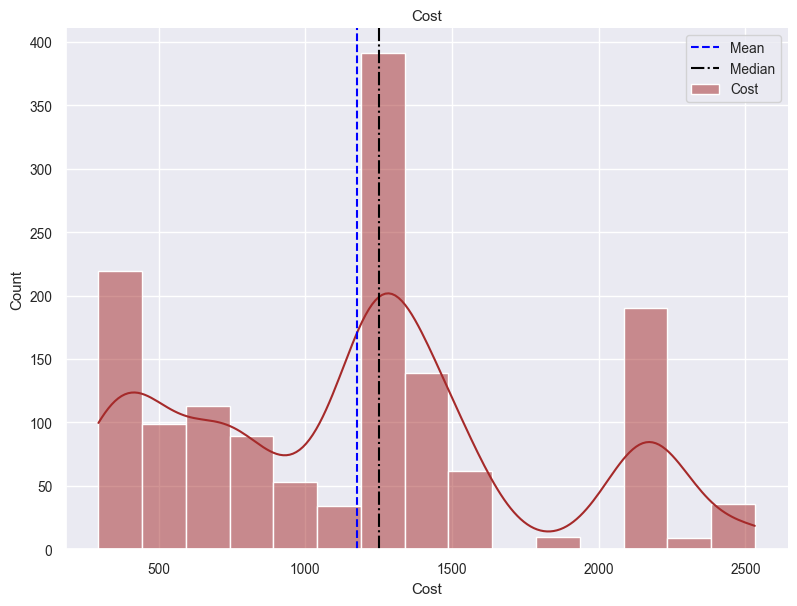

In [641]:
# histogram Cost
sns.displot(usc.Cost, bins=15,aspect=1.35,height=6, kde=True,label = 'Cost',color='brown')
plt.axvline(usc.Cost.mean(),color='blue',label = 'Mean',ls='--')
plt.axvline(usc.Cost.median(),color='black',label = 'Median',ls='-.')
plt.title('Cost')
plt.legend()

In [642]:
# Skew after extreme values analysis
print('Cost Skew =',usc['Cost'].skew())

Cost Skew = 0.37623973495499474


From the visualization and calculation above, the skew value of __0.38__ obtained. This shows that the data is __normally distributed__.

### Central tendecy of column `Revenue` after extreme value analysis

The central tendency of `Revenue` column :
- __Mean__ of `Revenue` column is __$1,805.99__
- __Median__ of `Revenue` column is __$1.846__
- __Mode__ of `Revenue` column is __$2,274__
- __Standard Deviation__ of column `Revenue` is __928.72__
- __Range__ of `Revenue` column is __$3,940__
- __Variance__ of `Revenue` column is __862,523.04__

Below is a histogram of the `Revenue` column :

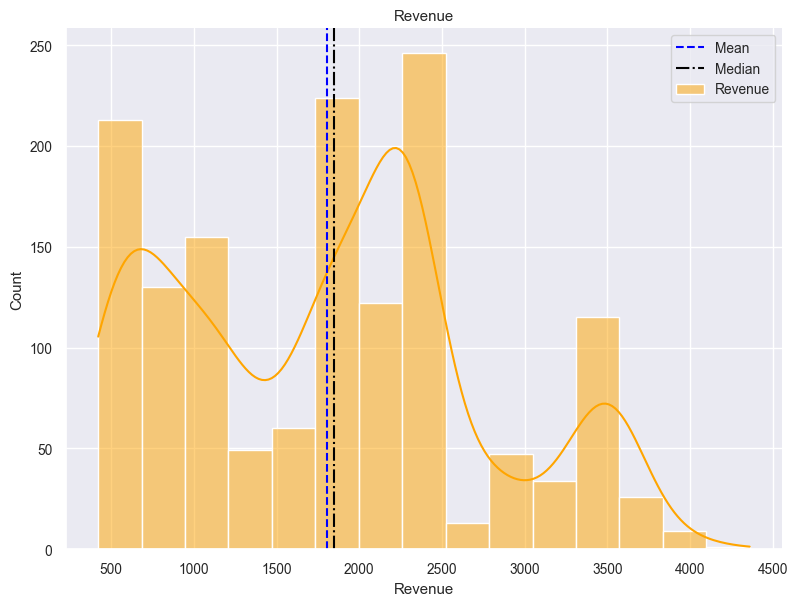

In [643]:
# histogram Revenue
sns.displot(usc.Revenue, bins=15,aspect=1.35,height=6, kde=True,label = 'Revenue',color='orange')
plt.axvline(usc.Revenue.mean(),color='blue',label = 'Mean',ls='--')
plt.axvline(usc.Revenue.median(),color='black',label = 'Median',ls='-.')
plt.title('Revenue')
plt.legend()

In [644]:
# Skew after extreme values analysis
print('Revenue Skew =',usc['Revenue'].skew())

Revenue Skew = 0.28864412626689223


From the visualization and calculation above, the skew value of __0.29__ obtained. This shows that the data is __normally distributed__.

## Correlation Analysis

In [645]:
# create a new variable
uss = us.copy()
uss.drop(index = df_upperp.index,inplace=True)
uss.drop(index = df_upperc.index,inplace=True)
uss.drop(index = df_upperr.index,inplace=True)
uss.drop('Day',axis=1,inplace=True)
uss.drop('Year',axis=1,inplace=True)

Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. The study of how variables are correlated is called correlation analysis ([Source](https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/)).  

Below is a visualization correlation matrix of the dataset :

<AxesSubplot: >

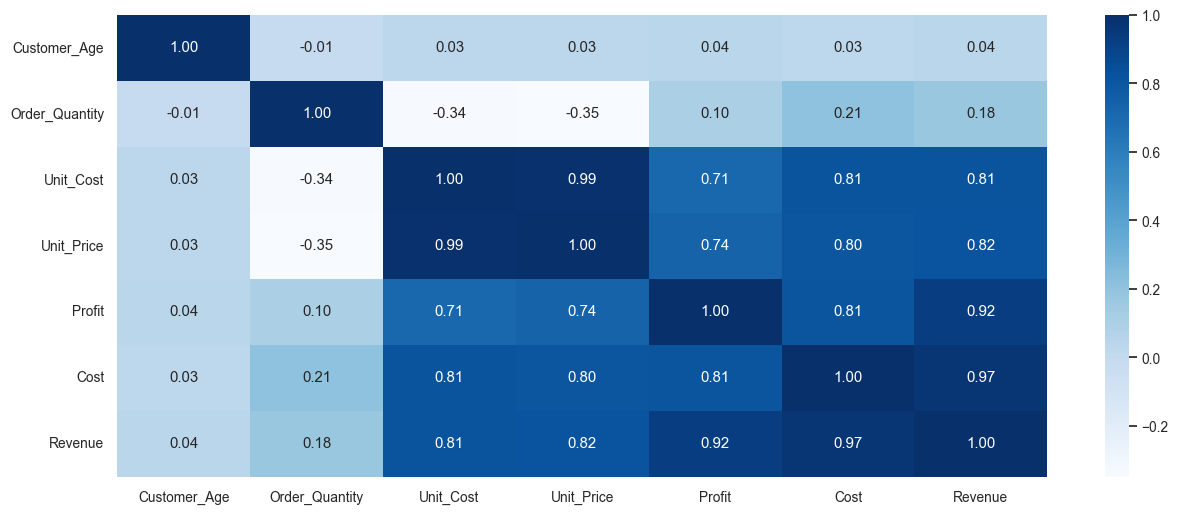

In [646]:
# Correlation Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(uss.corr(numeric_only=True),annot=True,cmap='Blues', fmt='.2f')

From the correlation matrix above it is known that `Cost` and `Revenue` have the highest correlation value (__0.97__). This shows that `Cost` and `Revenue` have a strong relationship with each other. Also from the correlation matrix above `Unit Price` and `Order Quantity` have the lowest correlation value (__-0.35__). This show that `Unit Price` and `Order Quantity` are have no relation with each other.

---

# vii. Inferential Statistics Analysis

## Hypothesis Testing

The hypothesis testing that was carried out was to find out whether there was a significant difference in bike sales revenue between male and female customers.

- Null Hypothesis (H0) : There was no significant difference in bike sales `Revenue` between male and female customers.
- Alternative Hypothesis (H1) :  There was a significant difference in bike sales `Revenue` between male and female customers.

`H0 : μ Bike sales revenue from male customers = μ Bike sales revenue from male customers`

`H1 : μ Bike sales revenue from male customers != μ Bike sales revenue from male customers`


### T-Test

The T-test was carried out to obtain the P and t values. The T-test is performed using the `scipy.stats.test_ind() function`. Here are the step for T-Test calculation:

In [647]:
# filter by gender
male = uss[uss['Customer_Gender']=='Male']
female = uss[uss['Customer_Gender']=='Female']

In [648]:
# Two Samples Two Tailed
# t-test
t_stat, p_val = stats.ttest_ind(male['Revenue'], female['Revenue'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.218686642058106
t-statistics: 1.230564070360299


Frow the calculation above, the P value of __0.22__ obtained. Where are the __P value > 0.05__ indicates __fail to reject the null hypothesis__. For more details, see the visualization below.

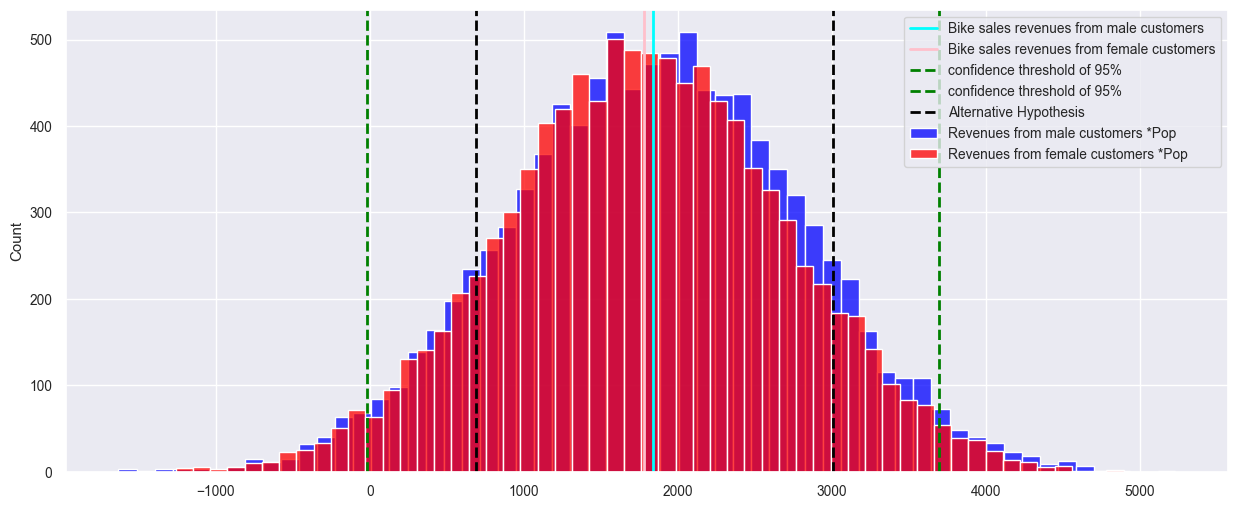

In [649]:
# simulation
# numpy.random.normal (loc = avg , scale = std, size = asumption 10.000 sample)
male_pop = np.random.normal(male['Revenue'].mean(),male['Revenue'].std(),10000)
female_pop = np.random.normal(female['Revenue'].mean(),female['Revenue'].std(),10000)

# confidence interval based on sum of profit for male, confidence level 0.05
confidence_interval = stats.norm.interval(0.95, male['Revenue'].mean(), male['Revenue'].std())

#plot histogram
plt.figure(figsize=(15,6))
sns.histplot(male_pop, label='Revenues from male customers *Pop',color='blue') # histogram male
sns.histplot(female_pop, label='Revenues from female customers *Pop ',color='red') # histogram female

# plot mean value
plt.axvline(male['Revenue'].mean(), color='cyan', linewidth=2, label='Bike sales revenues from male customers') # mean male
plt.axvline(female['Revenue'].mean(), color='pink',  linewidth=2, label='Bike sales revenues from female customers') # mean female

#plot confidence interval 
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%') # confidence interval Male
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%') # confidence interval Female

# alternative hypothesis
plt.axvline(male_pop.mean()+t_stat*male_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis') # Right Side
plt.axvline(male_pop.mean()-t_stat*male_pop.std(), color='black', linestyle='dashed', linewidth=2) # Left Side

plt.legend()

From the visualization above, it can be seen that the alternative hypothesis (black dashed line) is within the confidence interval range (green dashed line). So that it can be concluded that it __fails to reject null hypothesis (H0)__, which means that __There was no significant difference__ in bike sales `Revenue` between male and female customers.

---

# viii. Conclusion and Recommendation

The conclusion that can be drawn from the analysis that has been conducted is:

1. The country with the most bike sales is the United States with total sales of 38,840 units.
2. The year with the highest revenues generated from selling bikes is 2015 with total revenue of $19,945,703.
3. The types of bikes with the highest sales is mountain bike 
4. The age group of customers with the most bike sales is Adult (35-64).
5. There was no significant difference in bike sales Revenue between male and female customers.

The recommendation that can be given from the analysis that has been done is that for future bike sales analysis, a more complete dataset can be used because the dataset used for this analysis is incomplete. There are some data missing for certain dates.


---

__Special thanks__ : [Link](https://chat.openai.com/chat)